In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [580]:
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")
X = df.drop(["target", "index"], axis=1)
y = df[["target"]]

In [581]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [582]:
train_cut_X = train_X[train_X.columns[:5]]
test_cut_X = test_X[train_X.columns[:5]]

In [583]:
all_features = train_cut_X.columns

In [584]:
i = all_features[0]
N = all_features[0:]

In [585]:
def subsets(S):
  sets = []
  len_s = len(S)
  for i in range (1 << len_s):
    subset = [S[bit] for bit in range(len_s) if i &(1 << bit)]
    sets.append(subset)
  return sets

In [586]:
all_s = subsets(N)[1:]
all_s

[['back-suspension'],
 ['battery-capacity'],
 ['back-suspension', 'battery-capacity'],
 ['charge-time'],
 ['back-suspension', 'charge-time'],
 ['battery-capacity', 'charge-time'],
 ['back-suspension', 'battery-capacity', 'charge-time'],
 ['compression'],
 ['back-suspension', 'compression'],
 ['battery-capacity', 'compression'],
 ['back-suspension', 'battery-capacity', 'compression'],
 ['charge-time', 'compression'],
 ['back-suspension', 'charge-time', 'compression'],
 ['battery-capacity', 'charge-time', 'compression'],
 ['back-suspension', 'battery-capacity', 'charge-time', 'compression'],
 ['consumption-mixed'],
 ['back-suspension', 'consumption-mixed'],
 ['battery-capacity', 'consumption-mixed'],
 ['back-suspension', 'battery-capacity', 'consumption-mixed'],
 ['charge-time', 'consumption-mixed'],
 ['back-suspension', 'charge-time', 'consumption-mixed'],
 ['battery-capacity', 'charge-time', 'consumption-mixed'],
 ['back-suspension', 'battery-capacity', 'charge-time', 'consumption-mixe

In [587]:
def sub(a, s):
  s1 = []
  for x in s:
    if a not in x:
      s1.append(x)
  return s1

In [588]:
def shap_alg(s2, a):
  fi = 0
  for i in s2:
    b = i.copy()
    train_cut_X_1 = train_cut_X[i]
    test_cut_X_1 = test_cut_X[i]
    reg1 = LinearRegression().fit(train_cut_X_1, train_y)
    b.append(a)
    train_cut_X_2 = train_cut_X[b]
    test_cut_X_2 = test_cut_X[b]
    reg2 = LinearRegression().fit(train_cut_X_2, train_y)
    fi += (math.factorial(len(x))*math.factorial(5- len(i) - 1)/math.factorial(5))*(mean_squared_error(reg1.predict(test_cut_X_1), test_y) - mean_squared_error(reg2.predict(test_cut_X_2), test_y) )
  return fi

In [589]:
shap_dict = {}

In [590]:
for name in train_cut_X.columns:
  subs = sub(name, all_s)
  shap_dict[name] = shap_alg(subs, name)
sorted(shap_dict.items(), key=lambda item: item[1],  reverse=True)

[('back-suspension', 8721.793370425326),
 ('consumption-mixed', 4922.929338100867),
 ('charge-time', 3987.95122773875),
 ('battery-capacity', 512.1770115762716),
 ('compression', 5.9178705837053736)]

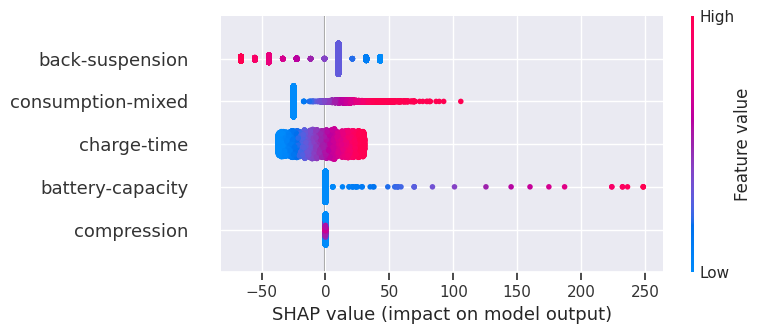

In [591]:
reg = LinearRegression().fit(train_cut_X, train_y)

explainer = shap.Explainer(reg, train_cut_X)
shap_values = explainer(test_cut_X)

shap.summary_plot(shap_values, test_cut_X)

Вывод: 
Результаты совпадают с результатами встроенного метода шепли